In [ ]:
import pertpy as pt
import scanpy as sc
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Augur results

[0.         0.01111111 0.02222222 0.03333333 0.04444444 0.05555556
 0.06666667 0.07777778 0.08888889 0.1        0.11111111 0.12222222
 0.13333333 0.14444444 0.15555556 0.16666667 0.17777778 0.18888889
 0.2        0.21111111 0.22222222 0.23333333 0.24444444 0.25555556
 0.26666667 0.27777778 0.28888889 0.3        0.31111111 0.32222222
 0.33333333 0.34444444 0.35555556 0.36666667 0.37777778 0.38888889
 0.4        0.41111111 0.42222222 0.43333333 0.44444444 0.45555556
 0.46666667 0.47777778 0.48888889 0.5        0.51111111 0.52222222
 0.53333333 0.54444444 0.55555556 0.56666667 0.57777778 0.58888889
 0.6        0.61111111 0.62222222 0.63333333 0.64444444 0.65555556
 0.66666667 0.67777778 0.68888889 0.7        0.71111111 0.72222222
 0.73333333 0.74444444 0.75555556 0.76666667 0.77777778 0.78888889
 0.8        0.81111111 0.82222222 0.83333333 0.84444444 0.85555556
 0.86666667 0.87777778 0.88888889 0.9        0.91111111 0.92222222
 0.93333333 0.94444444 0.95555556 0.96666667 0.97777778 0.9888

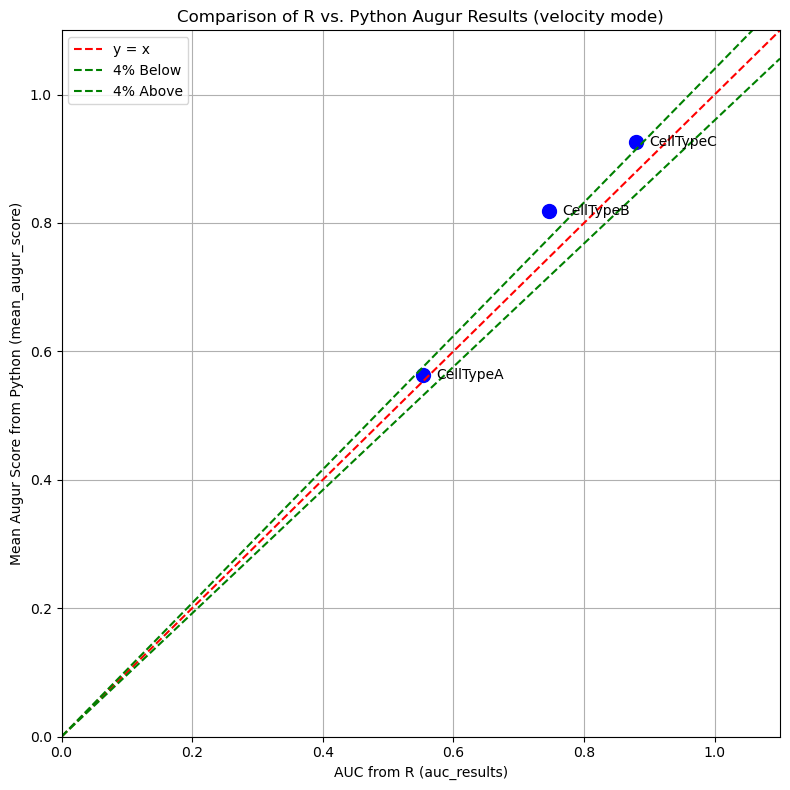

In [4]:
# 3. Extract Python mean_augur_score
py_scores = summary_metrics.loc["mean_augur_score"]  # row is "mean_augur_score"
py_scores_df = py_scores.reset_index()
py_scores_df.columns = ["cell_type", "python_score"]

# 4. Merge with R results by cell_type
merged_df = pd.merge(auc_results, py_scores_df, on="cell_type")

# 5. Plot the points
plt.figure(figsize=(8, 8))

plt.scatter(merged_df["auc"], merged_df["python_score"], s=100, color="blue")

for _, row in merged_df.iterrows():
    plt.text(row["auc"] + 0.02, row["python_score"], row["cell_type"],
             fontsize=10, verticalalignment='center')

# 6. Plot lines: y = x, y = 0.96x, y = 1.04x
x_vals = np.linspace(0, 1.1, 100)
plt.plot(x_vals, x_vals, ls="--", c="red", label="y = x")             # Diagonal
plt.plot(x_vals, 0.96 * x_vals, ls="--", c="green", label="4% Below") # 96% line
plt.plot(x_vals, 1.04 * x_vals, ls="--", c="green", label="4% Above") # 104% line

print(x_vals)
print(x_vals*0.96)
print(x_vals*1.04)

# 7. Adjust axis limits
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)

plt.xlabel("AUC from R (auc_results)")
plt.ylabel("Mean Augur Score from Python (mean_augur_score)")
plt.title("Comparison of R vs. Python Augur Results (velocity mode)")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Debug

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from pertpy.tools import Augur
from pertpy.data import sc_sim_augur
from scanpy import read_h5ad
from anndata import AnnData
from pathlib import Path

In [ ]:
# I/O
input = snakemake.input[0]
output = snakemake.output[0]

# load data
adata = read_h5ad(input)
ag_rfc = Augur("random_forest_classifier")
loaded_data = ag_rfc.load(adata)

v_adata, v_results = ag_rfc.predict(loaded_data, 
                                    subsample_size=20, 
                                    n_threads=snakemake.threads, 
                                    augur_mode='default', 
                                    select_variance_features=True)
print(v_results["summary_metrics"])

if output:
    Path(output).touch()